In [ ]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['figure.figsize'] = [10,10]

In [ ]:
def read_experiment_results(full_path, iterations, epochs=100):
    dir_name = full_path
    results = []
    for it in range(iterations):
        with open(dir_name + 'iteration_' + str(it) + '.json') as json_file:
            if it % 10 == 0:
                print(it)
            data = json.load(json_file)
            results.append(data)
    print("Finished reading ", full_path)
    return results


In [ ]:
run_number = ['8']
iterations = 495
os_string = "osx"
results = []
if os_string == "osx":
    path = "/Users/soren/Google Drive/My Drive/results/autolr-2022-06-30/run_"
elif os_string == "w10":
    path = "G:\\My Drive\\results\\autolr-2022-05-25\\run_"
for i in run_number: 
    results.append(read_experiment_results(path + i + '/', iterations))


In [43]:
best = 1
it = 0
best_indivs = {}
averages = []
best_indiv = None
for generation in results[0]:
    new_best = False 
    total_fits = 0
    for indiv in generation:
        total_fits += indiv["fitness"]
        if indiv["fitness"] < best:
            best = indiv["fitness"]
            best_indiv = indiv
            best_indivs[it] = indiv
            new_best = True
    averages.append(total_fits/len(generation))
    if new_best:
        print(f"[{it}] New Best: {best} {best_indiv['smart_phenotype']}")
    it += 1



[0] New Best: -0.616770887374878 multiply(subtract(negative(sigma), grad), constant(1.07052146e-01))
[2] New Best: -0.6205817957719167 multiply(subtract(negative(sigma), grad), constant(1.07052146e-01))
[3] New Best: -0.6220454573631287 multiply(subtract(negative(sigma), multiply(grad, add(sqrt(constant(9.92962885e-01)), add(divide_no_nan(add(beta, negative(sqrt(subtract(beta, beta)))), grad), sqrt(beta))))), constant(1.07052146e-01))
[7] New Best: -0.737341833114624 multiply(subtract(sigma, grad), constant(2.47663801e-01))
[10] New Best: -0.7721418142318726 multiply(subtract(negative(beta), grad), constant(1.56514861e-02))
[11] New Best: -0.8018436312675477 multiply(subtract(negative(grad), grad), constant(5.07243606e-02))
[16] New Best: -0.8075090885162354 multiply(subtract(negative(grad), grad), constant(1.90885420e-02))
[18] New Best: -0.812030295530955 multiply(subtract(negative(beta), grad), constant(8.92170603e-02))
[22] New Best: -0.8132981896400452 multiply(subtract(negative(g

We can see that best fitness and average fitness improve together until the best individual in generation 124.
After this generation, average fitness descreases, despite the improvements of the best individual.
Let's take a look at the best individuals, why is this happening?

In [40]:
print(f"[44] {best_indivs[44]['smart_phenotype']} {averages[85]}")
print(f"[86] {best_indivs[86]['smart_phenotype']} {averages[87]}")
print(f"[88] {best_indivs[88]['smart_phenotype']} {averages[97]}")
print(f"[98] {best_indivs[98]['smart_phenotype']} {averages[102]}")
print(f"[103] {best_indivs[103]['smart_phenotype']} {averages[111]}")
print(f"[112] {best_indivs[112]['smart_phenotype']} {averages[123]}")
print(f"[124] {best_indivs[124]['smart_phenotype']} {averages[139]}")
print(f"[140] {best_indivs[140]['smart_phenotype']} {averages[238]}")
print(f"[239] {best_indivs[239]['smart_phenotype']} {averages[493]}")

[44] multiply(multiply(negative(beta), grad), constant(2.87185901e-01)) -0.5619148170979651
[86] multiply(multiply(negative(beta), grad), divide_no_nan(constant(5.07243606e-02), constant(9.99657809e-01))) -0.39747547088479074
[88] multiply(multiply(negative(beta), grad), divide_no_nan(constant(5.07243606e-02), alpha)) -0.5246912508072868
[98] multiply(multiply(negative(beta), grad), divide_no_nan(constant(7.41067363e-02), alpha)) -0.5411762375532007
[103] multiply(multiply(negative(beta), grad), divide_no_nan(constant(5.07243606e-02), constant(9.97895596e-01))) -0.5402628265018832
[112] multiply(multiply(negative(beta), grad), divide_no_nan(constant(8.92170603e-02), alpha)) -0.5546214219113766
[124] multiply(divide_no_nan(add(multiply(negative(alpha), grad), multiply(negative(alpha), grad)), constant(2.47663801e-01)), constant(5.07243606e-02)) -0.4683156347462598
[140] multiply(multiply(negative(beta), grad), divide_no_nan(constant(8.92170603e-02), constant(9.91401013e-01))) -0.4678354

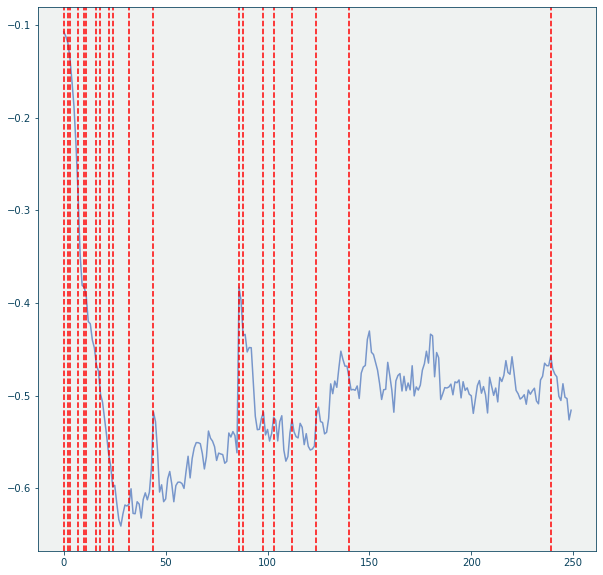

In [39]:
ax = plt.axes()
ax.set_facecolor(color="#eff2f1")
ax.spines['bottom'].set_color('#08415c')
ax.spines['top'].set_color('#08415c')
ax.spines['left'].set_color('#08415c')
ax.spines['right'].set_color('#08415c')
ax.xaxis.label.set_color('#08415c')
ax.yaxis.label.set_color('#08415c')
ax.tick_params(axis='x', colors='#08415c')
ax.tick_params(axis='y', colors="#08415c")
plt.plot([x for x in range(len(averages[:250]))], averages[:250], label='population average', color="#7796cb")
for x in best_indivs:
    plt.axvline(x, color='red', linestyle='--')

In [46]:
from smart_phenotype import readable_phenotype
print(readable_phenotype(best_indivs[44]['phenotype']))
print("---")
print(readable_phenotype(best_indivs[86]['phenotype']))

constant(2.28478855e-04)
alpha
multiply(negative(beta), grad)
multiply(sigma, constant(2.87185901e-01))

---
constant(6.23645483e-01)
constant(9.99657809e-01)
multiply(negative(beta), grad)
multiply(sigma, divide_no_nan(constant(5.07243606e-02), beta))



Momentum term and learning rate are the same values. Mutations in this value are likely very destructive